In [14]:
# importing necessary libraries 
import numpy as np
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plots  
import locale
locale.setlocale(locale.LC_ALL, '')

'en_GB.UTF-8'

In [18]:
# static portfolio model over a period of time in years 

investment_value = 10000
time_period = 30
avg_return = .07
eoy_investment_addition = 10000

for year in range(time_period):
    year_ending = investment_value * (1+avg_return) + eoy_investment_addition
    print(locale.currency(year_ending, grouping=True))
    investment_value = year_ending

£20,700.00
£32,149.00
£44,399.43
£57,507.39
£71,532.91
£86,540.21
£102,598.03
£119,779.89
£138,164.48
£157,835.99
£178,884.51
£201,406.43
£225,504.88
£251,290.22
£278,880.54
£308,402.17
£339,990.33
£373,789.65
£409,954.92
£448,651.77
£490,057.39
£534,361.41
£581,766.71
£632,490.38
£686,764.70
£744,838.23
£806,976.91
£873,465.29
£944,607.86
£1,020,730.41


In [29]:
# using a monte carlo model to predict future value of a portfolio based on historic data 
# you will need to find out the following of a portfolio: expected return and volatility (preferably yearly basis)

investment_value = 10000
time_period = 30
expected_return = .09
volatility = .18
eoy_investment_addition = 10000

print("\tMC Rate of Return", "\t\tYear Ending Portfolio")
for years in range(time_period):
    montecarlo_ror_rand = np.random.normal(expected_return, volatility)
    future_value = investment_value * (1 + montecarlo_ror_rand) + eoy_investment_addition
    investment_value = future_value
    print("\t{}".ljust(10).format(round(montecarlo_ror_rand,4)), "\t{}".rjust(10).format(locale.currency(future_value, grouping=True)))
    
    
    # this is just one iteration of the Monte-Carlo simulation. 
    #For it become more effective, we will need to repeat the process above multiple times to make a better
    #future prediction. 


	MC Rate of Return 		Year Ending Portfolio
	-0.0097               	£19,902.94
	-0.1144               	£27,626.73
	0.1771               	£42,519.98
	0.0897               	£56,332.73
	0.1482               	£74,681.30
	-0.0072               	£84,147.12
	0.1991               	£110,896.96
	0.2998               	£154,149.19
	0.0772               	£176,049.41
	-0.2257               	£146,316.98
	-0.009               	£155,006.01
	-0.0036               	£164,443.40
	-0.2615               	£131,446.43
	0.035               	£146,041.58
	0.1257               	£174,397.51
	-0.2906               	£133,717.69
	0.0824               	£154,735.38
	-0.0408               	£158,423.10
	0.1576               	£193,389.45
	0.1152               	£225,676.32
	0.1665               	£273,249.97
	0.3849               	£388,430.19
	0.1473               	£455,648.16
	0.1702               	£543,185.16
	0.0374               	£573,497.36
	0.1764               	£684,689.60
	0.0928               	£758,233.76
	0.081     

In [59]:
# Implementing Monte-Carlo simulation with iterations

simulation = DataFrame()
iterations = 5000


for i in range(iterations):
    investment_value = 10000
    time_period = 30
    expected_return = .09
    volatility = .18
    eoy_investment_addition = 10000
    stream = []
    for j in range(time_period):
        year_ending_value = round(investment_value * (1 + np.random.normal(expected_return,volatility)) + eoy_investment_addition)
        
        stream.append(year_ending_value)
        
        investment_value = year_ending_value

    simulation[i] = stream
    
    
    
print(simulation[list(range(5))])


    
    

          0       1        2       3        4
0     22176   21684    21895   21980    21214
1     35007   34046    30000   31025    33535
2     49039   48435    48661   46297    44811
3     63692   54497    58315   58178    47604
4     68838   67366    60852   76298    73434
5     84857   85670    83060   99088    64675
6     93403  105570    80724  104011    79340
7    116924  123724    91100  114343    85960
8    138018  193658    86025  142210   137242
9    167625  200011   113865  150401   162825
10   223861  203847   130621  156509   223658
11   267168  260217   181651  166741   205390
12   292560  221880   203831  203494   285908
13   349953  253272   240228  245828   328610
14   440800  303772   279518  166585   428029
15   632876  234618   330053  217255   398149
16   655516  261709   349105  174021   478719
17   692755  238226   377720  232247   496231
18   734313  324735   463039  255539   453439
19   676823  388339   542349  262834   493051
20   783540  374717   530566  3311

TypeError: cannot convert the series to <class 'float'>

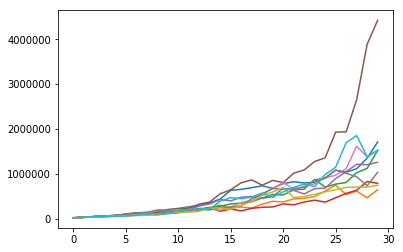

In [61]:
# to visually plot the results of the simulation 

plots.plot(simulation[list(range(10))])

In [69]:
# Gathering statistics from the simulation
print("Iterations:", len(simulation.loc[29]))
print("Mean:", locale.currency(np.mean(simulation.loc[29]),grouping=True))
print("SD:", locale.currency(np.std(simulation.loc[29]),grouping=True))
# max, min, modal etc.

#Using pandas built-in stats method
results = simulation.loc[29]
results.describe()

Iterations: 5000
Mean: £1,486,182.37
SD: £1,154,686.20


count    5.000000e+03
mean     1.486182e+06
std      1.154802e+06
min      1.299920e+05
25%      7.596148e+05
50%      1.160766e+06
75%      1.864439e+06
max      1.441750e+07
Name: 29, dtype: float64

(array([ 58., 236., 360., 422., 484., 436., 424., 354., 329., 239., 205.,
        179., 169., 151., 134.,  82.,  86.,  85.,  71.,  51.,  49.,  45.,
         53.,  31.,  28.,  28.,  27.,  17.,  27.,  16.,  16.,  10.,   7.,
          8.,  10.,   7.,   8.,   6.,   3.,   2.,   5.,   3.,   3.,   2.,
          4.,   2.,   1.,   3.,   1.,   3.,   1.,   0.,   2.,   0.,   1.,
          0.,   1.,   2.,   2.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,
          2.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([  129992.  ,   272867.05,   415742.1 ,   558617.15,   701492.2 ,
          844367.25,   987242.3 ,  1130117.35,  1272992.4 ,  1415867.45,
         1558742.5 ,  1701617.55,  1844492.6 ,  1987367.65,  2130242.7 ,
         2273117.75,  2415992.8 ,  2558867.85,  2701742.9 ,  2844617.95,
         2987493.  ,  3130

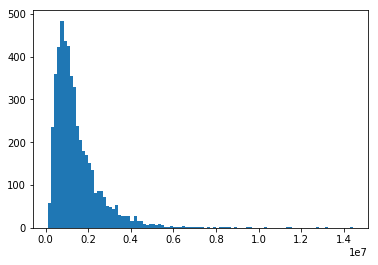

In [75]:
#plotting a histogram to view distribution 
plots.hist(results, bins=100)

In [81]:
#when dealing with portfolios, you would want to work out the probability 
#of acheiving an expected value. this will be usefull when making a decision

#for example, what is the probability of acheiving £1m on this portfolio 
(len(results[results > 1000000]) / len(results)) * 100

59.260000000000005